In [ ]:
!pip install lightgbm
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

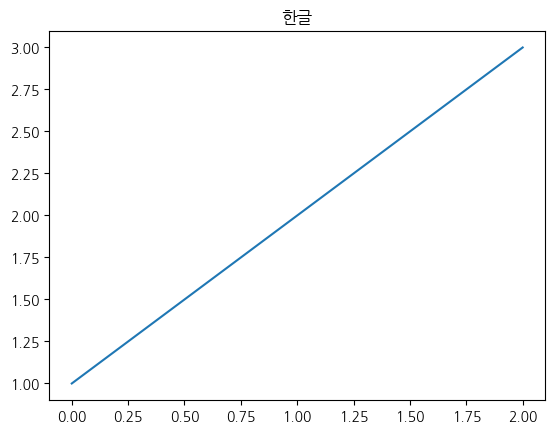

In [ ]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 0. 라이브러리 임포트

In [ ]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


### 1. 데이터 불러오기

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml/data/20230911_인코딩완료.csv')

In [ ]:
data.columns

Index(['매출', '기준_년_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '점포수', '시간대1',
       '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', '총 상주인구 수',
       '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수',
       '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수',
       '시간대_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', 'area', '연령대_10_생활인구_수', '연령대_20_생활인구_수',
       '연령대_30_생활인구_수', '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수',
       '배후지_아파트_단지_수', '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수',
       '배후지_아파트_가격_2_억_세대_수', '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수',
       '배후지_아파트_가격_5_억_세대_수', '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수',
       '시간대_지하철_승하차승객수', '버스정류장_수', '지하철역_수'],
      dtype='object')

In [ ]:
df=data.fillna(0)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6592
[LightGBM] [Info] Number of data points in the train set: 4387, number of used features: 53
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 225157.879862


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6587
[LightGBM] [Info] Number of data points in the train set: 4387, number of used features: 53
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 225246.459115


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6590
[LightGBM] [Info] Number of data points in the train set: 4387, number of used features: 53
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 224022.875191


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6597
[LightGBM] [Info] Number of data points in the train set: 4387, number of used features: 53
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 222534.429386


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6590
[LightGBM] [Info] Number of data points in the train set: 4388, number of used features: 53
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 226069.592932
평균 RMSE: 56659.365477547726
평균 MAE: 36799.33724046311


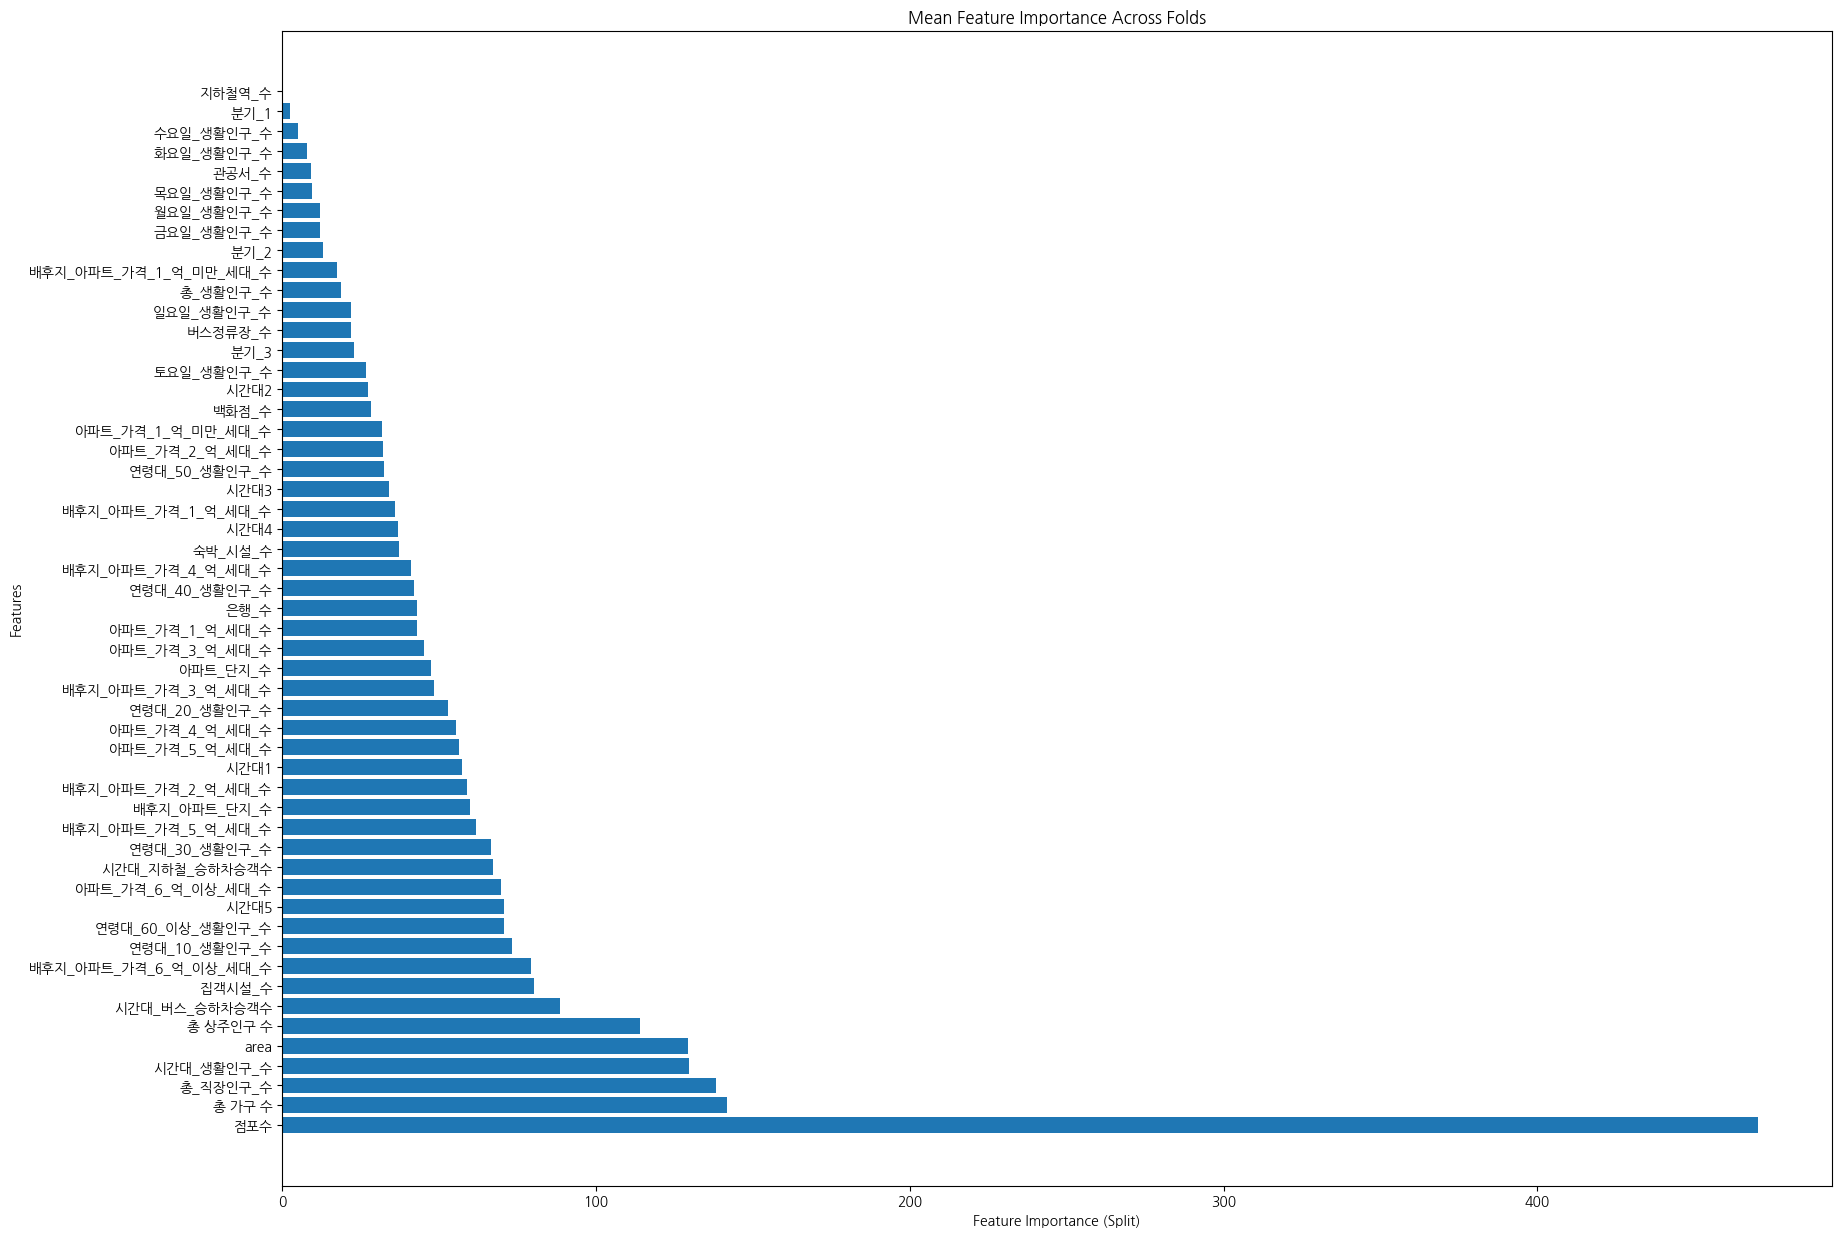

In [ ]:
X = data[['점포수', '시간대1',
       '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', '총 상주인구 수',
       '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수',
       '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수',
       '시간대_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', 'area', '연령대_10_생활인구_수', '연령대_20_생활인구_수',
       '연령대_30_생활인구_수', '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수',
       '배후지_아파트_단지_수', '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수',
       '배후지_아파트_가격_2_억_세대_수', '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수',
       '배후지_아파트_가격_5_억_세대_수', '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수',
       '시간대_지하철_승하차승객수', '버스정류장_수', '지하철역_수']]

y = data['매출']

# k-폴드 교차 검증
k_folds = 5

# KFold 객체 생성
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# 모델 파라미터를 설정
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# k-폴드
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # 데이터셋
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

    # LightGBM 모델 학습
    num_round = 100  # 학습 라운드 수
    bst = lgb.train(params, train_data, num_round, valid_sets=[val_data], early_stopping_rounds=10, verbose_eval=False)

    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val, num_iteration=bst.best_iteration)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # 모델 평가 (MAE)
    mae = mean_absolute_error(y_val, y_pred)
    mae_scores.append(mae)

    # 특성 중요도 저장
    feature_importance_list.append(bst.feature_importance(importance_type='split'))

# 교차 검증 RMSE 스코어 평균 계산
mean_rmse = np.mean(rmse_scores)
print(f'평균 RMSE: {mean_rmse}')

# 교차 검증 MAE 스코어 평균 계산
mean_mae = np.mean(mae_scores)
print(f'평균 MAE: {mean_mae}')

# 특성 중요도의 평균 계산
mean_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 중요도 시각화
feature_names = X.columns
sorted_idx = np.argsort(mean_feature_importance)[::-1]  # 정렬
sorted_feature_names = feature_names[sorted_idx]
sorted_feature_importance = mean_feature_importance[sorted_idx]

plt.figure(figsize=(20, 15))
plt.barh(sorted_feature_names, sorted_feature_importance)
plt.xlabel('Feature Importance (Split)')
plt.ylabel('Features')
plt.title('Mean Feature Importance Across Folds')
plt.show()


In [ ]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml/data/20230911_인코딩완료.csv')
X = data[['점포수', '시간대1',
       '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', '총 상주인구 수',
       '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수',
       '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수',
       '시간대_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', 'area', '연령대_10_생활인구_수', '연령대_20_생활인구_수',
       '연령대_30_생활인구_수', '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수',
       '배후지_아파트_단지_수', '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수',
       '배후지_아파트_가격_2_억_세대_수', '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수',
       '배후지_아파트_가격_5_억_세대_수', '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수',
       '시간대_지하철_승하차승객수', '버스정류장_수', '지하철역_수']]

y = data['매출']

# 훈련 데이터와 테스트 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-fold 교차 검증 설정
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}

# K-fold 교차 검증
for train_idx, val_idx in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_kf, y_val_kf = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # 데이터셋 생성
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)

    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    random_search.fit(X_train_kf, y_train_kf)
    best_params = random_search.best_params_

    # 최적 파라미터로 모델 초기화
    bst = lgb.LGBMRegressor(**best_params)

    # 모델 훈련 with early stopping
    bst.fit(
        X_train_kf,
        y_train_kf,
        eval_set=[(X_val_kf, y_val_kf)],  # Specify the evaluation dataset
        eval_metric='rmse',  # Specify the evaluation metric (e.g., RMSE)
        early_stopping_rounds=best_params['early_stopping_rounds'],
        verbose=False
    )

    # 검증 데이터에 대한 예측
    y_pred_val = bst.predict(X_val_kf, num_iteration=bst.best_iteration)

    # 평가 지표 계산 (RMSE, MAE)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred_val))
    mae = mean_absolute_error(y_val_kf, y_pred_val)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)

# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("Best Hyperparameters for K-fold CV:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

# 최종 모델 학습 (전체 훈련 데이터)
final_model = lgb.LGBMRegressor(**best_params)
final_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_test = final_model.predict(X_test)

# 테스트 데이터 평가 (RMSE, MAE)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)
print(f'테스트 데이터 RMSE: {test_rmse}')
print(f'테스트 데이터 MAE: {test_mae}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


ValueError: ignored

In [ ]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml/data/20230911_인코딩완료.csv')
X = data[['점포수', '시간대1',
       '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', '총 상주인구 수',
       '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수',
       '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수',
       '시간대_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', 'area', '연령대_10_생활인구_수', '연령대_20_생활인구_수',
       '연령대_30_생활인구_수', '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수',
       '배후지_아파트_단지_수', '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수',
       '배후지_아파트_가격_2_억_세대_수', '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수',
       '배후지_아파트_가격_5_억_세대_수', '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수',
       '시간대_지하철_승하차승객수', '버스정류장_수', '지하철역_수']]

y = data['매출']

# 훈련 데이터와 테스트 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-fold 교차 검증 설정
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301))         # 200부터 300까지
}

# K-fold 교차 검증
for train_idx, val_idx in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_kf, y_val_kf = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # 데이터셋 생성
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)

    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    random_search.fit(X_train_kf, y_train_kf)
    best_params = random_search.best_params_

    # 최적 파라미터로 모델 초기화
    bst = lgb.LGBMRegressor(**best_params)

    # 모델 훈련 with early stopping
    bst.fit(
        X_train_kf,
        y_train_kf,
        eval_set=[(X_val_kf, y_val_kf)],  # Specify the evaluation dataset
        eval_metric='rmse',  # Specify the evaluation metric (e.g., RMSE)
    )

    # 검증 데이터에 대한 예측
    y_pred_val = bst.predict(X_val_kf)

    # 평가 지표 계산 (RMSE, MAE)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred_val))
    mae = mean_absolute_error(y_val_kf, y_pred_val)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)

# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("Best Hyperparameters for K-fold CV:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

# 최종 모델 학습 (전체 훈련 데이터)
final_model = lgb.LGBMRegressor(**best_params)
final_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_test = final_model.predict(X_test)

# 테스트 데이터 평가 (RMSE, MAE)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)
print(f'테스트 데이터 RMSE: {test_rmse}')
print(f'테스트 데이터 MAE: {test_mae}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[1]	valid_0's rmse: 157642	valid_0's l2: 2.4851e+10
[2]	valid_0's rmse: 153784	valid_0's l2: 2.36496e+10
[3]	valid_0's rmse: 150276	valid_0's l2: 2.25828e+10
[4]	valid_0's rmse: 146871	valid_0's l2: 2.15712e+10
[5]	valid_0's rmse: 143509	valid_0's l2: 2.05949e+10
[6]	valid_0's rmse: 140554	valid_0's l2: 1.97556e+10
[7]	valid_0's rmse: 137573	valid_0's l2: 1.89263e+10
[8]	valid_0's rmse: 134698	valid_0's l2: 1.81435e+10
[9]	valid_0's rmse: 131915	valid_0's l2: 1.74015e+10
[10]	valid_0's rmse: 129192	valid_0's l2: 1.66907e+10
[11]	valid_0's rmse: 126619	valid_0's l2: 1.60323e+10
[12]	valid_0's rmse: 124411	valid_0's l2: 1.5478e+10
[13]	valid_0's rmse: 122052	valid_0's l2: 1.48966e+10
[14]	valid_0's rmse: 120077	valid_0's l2: 1.44184e+10
[15]	valid_0's rmse: 117994	valid_0's l2: 1.39226e+10
[16]	valid_0's rmse: 115969	valid_0's l2: 1.34487e+10
[17]	valid_0's rmse: 114201	valid_0's l2: 1.30419e+10
[18]	valid_0's rmse: 112475	vali

In [20]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml/data/20230911_인코딩완료.csv')

X = data[['상권_코드', '점포수', '시간대1',
       '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', '총 상주인구 수',
       '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수',
       '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수',
       '시간대_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', 'area', '연령대_10_생활인구_수', '연령대_20_생활인구_수',
       '연령대_30_생활인구_수', '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수',
       '배후지_아파트_단지_수', '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수',
       '배후지_아파트_가격_2_억_세대_수', '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수',
       '배후지_아파트_가격_5_억_세대_수', '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수',
       '시간대_지하철_승하차승객수', '버스정류장_수', '지하철역_수']]
y = data['매출']


# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("Best Hyperparameters for K-fold CV:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 152599	training's l2: 2.32865e+10	valid_1's rmse: 160249	valid_1's l2: 2.56796e+10
[2]	training's rmse: 147078	training's l2: 2.16319e+10	valid_1's rmse: 154973	valid_1's l2: 2.40165e+10
[3]	training's rmse: 141887	training's l2: 2.01318e+10	valid_1's rmse: 150008	valid_1's l2: 2.25025e+10
[4]	training's rmse: 137055	training's l2: 1.8784e+10	valid_1's rmse: 145411	valid_1's l2: 2.11444e+10
[5]	training's rmse: 132299	training's l2: 1.75031e+10	valid_1's rmse: 140889	valid_1's l2: 1.98496e+10
[6]	training's rmse: 127892	training's l2: 1.63563e+10	valid_1's rmse: 136644	valid_1's l2: 1.86716e+10
[7]	training's rmse: 123802	training's l2: 1.53268e+10	valid_1's rmse: 132759	valid_1's l2: 1.7625e+10
[8]	training's rmse: 119857	training's l2: 1.43657e+10	valid_1's rmse: 129103	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 152181	training's l2: 2.3159e+10	valid_1's rmse: 161933	valid_1's l2: 2.62223e+10
[2]	training's rmse: 146793	training's l2: 2.15481e+10	valid_1's rmse: 156385	valid_1's l2: 2.44564e+10
[3]	training's rmse: 141617	training's l2: 2.00553e+10	valid_1's rmse: 151202	valid_1's l2: 2.28619e+10
[4]	training's rmse: 136702	training's l2: 1.86873e+10	valid_1's rmse: 146253	valid_1's l2: 2.139e+10
[5]	training's rmse: 132144	training's l2: 1.7462e+10	valid_1's rmse: 141768	valid_1's l2: 2.0098e+10
[6]	training's rmse: 127818	training's l2: 1.63374e+10	valid_1's rmse: 137349	valid_1's l2: 1.88647e+10
[7]	training's rmse: 123768	training's l2: 1.53184e+10	valid_1's rmse: 133408	valid_1's l2: 1.77978e+10
[8]	training's rmse: 119878	training's l2: 1.43707e+10	valid_1's rmse: 129480	vali

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 154449	training's l2: 2.38546e+10	valid_1's rmse: 152455	valid_1's l2: 2.32425e+10
[2]	training's rmse: 148815	training's l2: 2.21458e+10	valid_1's rmse: 147295	valid_1's l2: 2.16958e+10
[3]	training's rmse: 143512	training's l2: 2.05958e+10	valid_1's rmse: 142395	valid_1's l2: 2.02762e+10
[4]	training's rmse: 138400	training's l2: 1.91545e+10	valid_1's rmse: 137768	valid_1's l2: 1.89799e+10
[5]	training's rmse: 133714	training's l2: 1.78796e+10	valid_1's rmse: 133374	valid_1's l2: 1.77885e+10
[6]	training's rmse: 129289	training's l2: 1.67157e+10	valid_1's rmse: 129452	valid_1's l2: 1.67579e+10
[7]	training's rmse: 125094	training's l2: 1.56485e+10	valid_1's rmse: 125757	valid_1's l2: 1.58147e+10
[8]	training's rmse: 121148	training's l2: 1.46769e+10	valid_1's rmse: 122164

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 155201	training's l2: 2.40874e+10	valid_1's rmse: 149925	valid_1's l2: 2.24775e+10
[2]	training's rmse: 149724	training's l2: 2.24174e+10	valid_1's rmse: 144319	valid_1's l2: 2.08281e+10
[3]	training's rmse: 144654	training's l2: 2.09249e+10	valid_1's rmse: 139133	valid_1's l2: 1.93579e+10
[4]	training's rmse: 139827	training's l2: 1.95515e+10	valid_1's rmse: 134282	valid_1's l2: 1.80318e+10
[5]	training's rmse: 135312	training's l2: 1.83095e+10	valid_1's rmse: 129646	valid_1's l2: 1.6808e+10
[6]	training's rmse: 130886	training's l2: 1.7131e+10	valid_1's rmse: 125265	valid_1's l2: 1.56913e+10
[7]	training's rmse: 126609	training's l2: 1.60297e+10	valid_1's rmse: 120831	valid_1's l2: 1.46001e+10
[8]	training's rmse: 122721	training's l2: 1.50605e+10	valid_1's rmse: 117000	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 156062	training's l2: 2.43554e+10	valid_1's rmse: 146740	valid_1's l2: 2.15327e+10
[2]	training's rmse: 150490	training's l2: 2.26471e+10	valid_1's rmse: 141908	valid_1's l2: 2.0138e+10
[3]	training's rmse: 145188	training's l2: 2.10797e+10	valid_1's rmse: 137328	valid_1's l2: 1.88589e+10
[4]	training's rmse: 140371	training's l2: 1.9704e+10	valid_1's rmse: 133096	valid_1's l2: 1.77144e+10
[5]	training's rmse: 135637	training's l2: 1.83973e+10	valid_1's rmse: 129071	valid_1's l2: 1.66593e+10
[6]	training's rmse: 131020	training's l2: 1.71663e+10	valid_1's rmse: 125061	valid_1's l2: 1.56402e+10
[7]	training's rmse: 126929	training's l2: 1.61111e+10	valid_1's rmse: 121577	valid_1's l2: 1.47809e+10
[8]	training's rmse: 122966	training's l2: 1.51206e+10	valid_1's rmse: 118220	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 41393.89662219987
평균 MAE: 22535.855328346046
Best Hyperparameters for K-fold CV:
Fold 1: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 2: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 3: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 4: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 5: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
